In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, BatchNormalization, SpatialDropout2D, Concatenate, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

# Gambaran umum arsitektur dari Encoder Decoder yang digunakan

### Input dibagi menjadi 2 bagian:

1.   Input green -> hanya channel green saja yang digunakan
2.   Input RGB -> Keseluruhan 3 channel warna digunakan

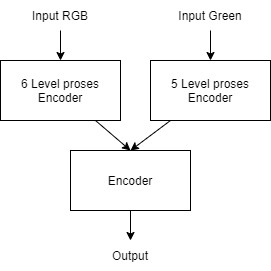


In [ ]:
# Definisi Input 
input_size_RGB = [576,576,3]
#input_size_RGB = [288,288,3]
input_size_green = [576,576,3]
#input_size_green = [288,288,3]
input_RGB = Input(shape=input_size_RGB)
input_green = Input(shape=input_size_green)

# Arsitektur Encoder Network


**Encoder network** terdiri dari 2 input RGB dan Green yang masing-masing inputnya diproses dalam arsitektur network yang terpisah. **RGB arsitektur** dibagi menjadi 6 level sedangkan **Green arsitektur** dibagi menjadi 5 level dimana tiap levelnya terdiri dari proses convolution dengan kernel (1,1);(3,3); dan (5,5). hasil proses convolution antara kernel (1,1) dengan (3,3) di gabungkan/conatenate dan kemudian dilakukan convolution dengan kernel (5,5). Setiap proses convolution disertai dengan BatchNormalization dan SpatialDropout.
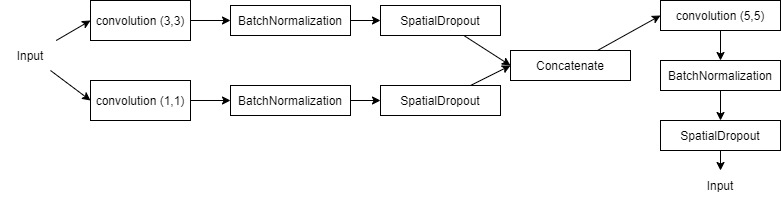

In [ ]:
### RGB Arsitektur
# level 1
RGB_b11 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(input_RGB)
RGB_b11 = SpatialDropout2D(0.5)(RGB_b11)
RGB_b11 = BatchNormalization()(RGB_b11)

RGB_b12 = Conv2D(16, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(input_RGB)
RGB_b12 = SpatialDropout2D(0.5)(RGB_b12)
RGB_b12 = BatchNormalization()(RGB_b12)

RGB_layer1 = Concatenate()([RGB_b11,RGB_b12])
RGB_conv1 = Conv2D(16, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer1)
RGB_conv1 = SpatialDropout2D(0.5)(RGB_conv1)
RGB_conv1 = BatchNormalization()(RGB_conv1)
MaxPool_RGB1 = MaxPooling2D(pool_size=(2,2))(RGB_conv1)

# RGB level 2
RGB_b21 = Conv2D(32, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB1)
RGB_b21 = SpatialDropout2D(0.5)(RGB_b21)
RGB_b21 = BatchNormalization()(RGB_b21)

RGB_b22 = Conv2D(32, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB1)
RGB_b22 = SpatialDropout2D(0.5)(RGB_b22)
RGB_b22 = BatchNormalization()(RGB_b22)

RGB_layer2 = Concatenate()([RGB_b21,RGB_b22])
RGB_conv2 = Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer2)
RGB_conv2 = SpatialDropout2D(0.5)(RGB_conv2)
RGB_conv2 = BatchNormalization()(RGB_conv2)
MaxPool_RGB2 = MaxPooling2D(pool_size=(2,2))(RGB_conv2)

# RGB level 3
RGB_b31 = Conv2D(64, kernel_size=(1,1), activation='relu',padding='same', kernel_initializer='he_normal')(MaxPool_RGB2)
RGB_b31 = SpatialDropout2D(0.5)(RGB_b31)
RGB_b31 = BatchNormalization()(RGB_b31)

RGB_b32 = Conv2D(64, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB2)
RGB_b32 = SpatialDropout2D(0.5)(RGB_b32)
RGB_b32 = BatchNormalization()(RGB_b32)

RGB_layer3 = Concatenate()([RGB_b31,RGB_b32])
RGB_conv3 = Conv2D(64, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer3)
RGB_conv3 = SpatialDropout2D(0.5)(RGB_conv3)
RGB_conv3 = BatchNormalization()(RGB_conv3)
MaxPool_RGB3 = MaxPooling2D(pool_size=(2,2))(RGB_conv3)

# RGB level 4
RGB_b41 = Conv2D(128, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(MaxPool_RGB3)
RGB_b41 = SpatialDropout2D(0.5)(RGB_b41)
RGB_b41 = BatchNormalization()(RGB_b41)

RGB_b42 = Conv2D(128, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB3)
RGB_b42 = SpatialDropout2D(0.5)(RGB_b42)
RGB_b42 = BatchNormalization()(RGB_b42)

RGB_layer4 = Concatenate()([RGB_b41,RGB_b42])
RGB_conv4 = Conv2D(128, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer4)
RGB_conv4 = SpatialDropout2D(0.5)(RGB_conv4)
RGB_conv4 = BatchNormalization()(RGB_conv4)
MaxPool_RGB4 = MaxPooling2D(pool_size=(2,2))(RGB_conv4)

# RGB level 5
RGB_b51 = Conv2D(256, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB4)
RGB_b51 = SpatialDropout2D(0.5)(RGB_b51)
RGB_b51 = BatchNormalization()(RGB_b51)

RGB_b52 = Conv2D(256, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_RGB4)
RGB_b52 = SpatialDropout2D(0.5)(RGB_b52)
RGB_b52 = BatchNormalization()(RGB_b52)

RGB_layer5 = Concatenate()([RGB_b51,RGB_b52])
RGB_conv5 = Conv2D(256, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer5)
RGB_conv5 = SpatialDropout2D(0.5)(RGB_conv5)
RGB_conv5 = BatchNormalization()(RGB_conv5)
MaxPool_RGB5 = MaxPooling2D(pool_size=(2,2))(RGB_conv5)

# RGB level 6
RGB_b61 = Conv2D(512, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(MaxPool_RGB5)
RGB_b61 = SpatialDropout2D(0.5)(RGB_b61)
RGB_b61 = BatchNormalization()(RGB_b61)

RGB_b62 = Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(MaxPool_RGB5)
RGB_b62 = SpatialDropout2D(0.5)(RGB_b62)
RGB_b62 = BatchNormalization()(RGB_b62)

RGB_layer6 = Concatenate()([RGB_b61,RGB_b62])
RGB_conv6 = Conv2D(512, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_layer6)
RGB_conv6 = SpatialDropout2D(0.5)(RGB_conv6)
RGB_conv6 = BatchNormalization()(RGB_conv6)

RGB_model = Model(inputs=input_RGB, outputs=RGB_conv6)

In [ ]:
### Green input
# Green level 1
green_b11 = Conv2D(16, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(input_green)
green_b11 = SpatialDropout2D(0.5)(green_b11)
green_b11 = BatchNormalization()(green_b11)

green_b12 = Conv2D(16, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(input_green)
green_b12 = SpatialDropout2D(0.5)(green_b12)
green_b12 = BatchNormalization()(green_b12)

green_layer1 = Concatenate()([green_b11,green_b12])
green_conv1 = Conv2D(16, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(green_layer1)
green_conv1 = SpatialDropout2D(0.5)(green_conv1)
green_conv1 = BatchNormalization()(green_conv1)
MaxPool_Green1 = MaxPooling2D(pool_size=(2,2))(green_conv1)

# Green level 2
green_b21 = Conv2D(32, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green1)
green_b21 = SpatialDropout2D(0.5)(green_b21)
green_b21 = BatchNormalization()(green_b21)

green_b22 = Conv2D(32, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green1)
green_b22 = SpatialDropout2D(0.5)(green_b22)
green_b22 = BatchNormalization()(green_b22)

green_layer2 = Concatenate()([green_b21,green_b22])
green_conv2 = Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(green_layer2)
green_conv2 = SpatialDropout2D(0.5)(green_conv2)
green_conv2 = BatchNormalization()(green_conv2)
MaxPool_Green2 = MaxPooling2D(pool_size=(2,2))(green_conv2)

# Green level 3
green_b31 = Conv2D(64, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green2)
green_b31 = SpatialDropout2D(0.5)(green_b31)
green_b31 = BatchNormalization()(green_b31)

green_b32 = Conv2D(64, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green2)
green_b32 = SpatialDropout2D(0.5)(green_b32)
green_b32 = BatchNormalization()(green_b32)

green_layer3 = Concatenate()([green_b31,green_b32])
green_conv3 = Conv2D(64, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(green_layer3)
green_conv3 = SpatialDropout2D(0.5)(green_conv3)
green_conv3 = BatchNormalization()(green_conv3)
MaxPool_Green3 = MaxPooling2D(pool_size=(2,2))(green_conv3)

# Green level 4
green_b41 = Conv2D(128, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green3)
green_b41 = SpatialDropout2D(0.5)(green_b41)
green_b41 = BatchNormalization()(green_b41)

green_b42 = Conv2D(128, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green3)
green_b42 = SpatialDropout2D(0.5)(green_b42)
green_b42 = BatchNormalization()(green_b42)

green_layer4 = Concatenate()([green_b41,green_b42])
green_conv4 = Conv2D(128, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(green_layer4)
green_conv4 = SpatialDropout2D(0.5)(green_conv4)
green_conv4 = BatchNormalization()(green_conv4)
MaxPool_Green4 = MaxPooling2D(pool_size=(2,2))(green_conv4)

# Green level 5
green_b51 = Conv2D(256, kernel_size=(1,1), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green4)
green_b51 = SpatialDropout2D(0.5)(green_b51)
green_b51 = BatchNormalization()(green_b51)

green_b52 = Conv2D(256, kernel_size=(3,3), activation='relu', padding="same", kernel_initializer='he_normal')(MaxPool_Green4)
green_b52 = SpatialDropout2D(0.5)(green_b52)
green_b52 = BatchNormalization()(green_b52)

green_layer5 = Concatenate()([green_b51,green_b52])
green_conv5 = Conv2D(256, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(green_layer5)
green_conv5 = SpatialDropout2D(0.5)(green_conv5)
green_conv5 = BatchNormalization()(green_conv5)

green_model = Model(inputs=input_green, outputs=green_conv5)

# Arsitektur Decoder Network
Pada arsitektur decoder network dilakukan beberapa tahap. Tahap awal adalah persiapan pertama untuk menyamakan size antara input RGB dan green karena perbedaan level decoder.

Tahap awal:
*   Melakukan proses transpose convolution terhadap output dari encoder RGB level 6 agar size sama dengan output green level 5
* Setelah melakukan proses diatas maka hal tersebut merupakan input untuk arsitektur decoder

Proses decoder dilakukan berdasarkan 5 Level. Setiap level dilakukan proses concatenate antara input dengan output dari encoder RGB dan Green yang memiliki size yang sama. setelah itu dilakukan proses convolution yang disertai dengan batchnormalization. kernel convolution yang dilakukan adalah (5,5); (3,3); (1,1).
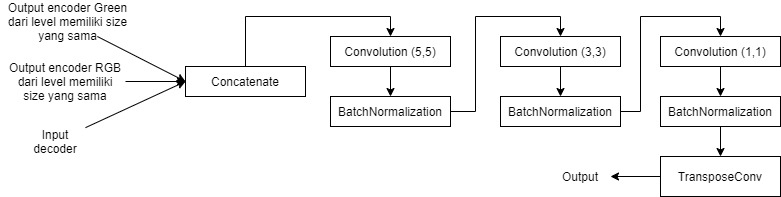



In [ ]:
### Decoder Layer
deconv1 = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', kernel_initializer='he_normal')(RGB_model.output)

# Level1
concat_deconv1 = Concatenate()([deconv1,green_model.output,RGB_conv5])
deconv2 = Conv2D(256, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(concat_deconv1)
deconv2 = BatchNormalization()(deconv2)
deconv2 = Conv2D(256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv2)
deconv2 = BatchNormalization()(deconv2)
deconv2 = Conv2D(256, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv2)
deconv2 = BatchNormalization()(deconv2)
deconv2 = Conv2DTranspose(128, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', kernel_initializer='he_normal')(deconv2)

# Level2
concat_deconv2 = Concatenate()([deconv2,green_conv4,RGB_conv4])
deconv3 = Conv2D(128, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(concat_deconv2)
deconv3 = BatchNormalization()(deconv3)
deconv3 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv3)
deconv3 = BatchNormalization()(deconv3)
deconv3 = Conv2D(128, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv3)
deconv3 = BatchNormalization()(deconv3)
deconv3 = Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', kernel_initializer='he_normal')(deconv3)

# Level 3
concat_deconv3 = Concatenate()([deconv3, green_conv3, RGB_conv3])
deconv4 = Conv2D(64, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(concat_deconv3)
deconv4 = BatchNormalization()(deconv4)
deconv4 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv4)
deconv4 = BatchNormalization()(deconv4)
deconv4 = Conv2D(64, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv4)
deconv4 = BatchNormalization()(deconv4)
deconv4 = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', kernel_initializer='he_normal')(deconv4)

# Level 4
concat_deconv4 = Concatenate()([deconv4, green_conv2, RGB_conv2])
deconv5 = Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(concat_deconv4)
deconv5 = BatchNormalization()(deconv5)
deconv5 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv5)
deconv5 = BatchNormalization()(deconv5)
deconv5 = Conv2D(32, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv5)
deconv5 = BatchNormalization()(deconv5)
deconv5 = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', kernel_initializer='he_normal')(deconv5)

# Level 5
concat_deconv5 = Concatenate()([deconv5, green_conv1, RGB_conv1])
deconv6 = Conv2D(16, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(concat_deconv5)
deconv6 = BatchNormalization()(deconv6)
deconv6 = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv6)
deconv6 = BatchNormalization()(deconv6)
deconv6 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv6)
deconv6 = BatchNormalization()(deconv6)

#Progressive dimenstion reduction
Progressive1 = Conv2D(8, kernel_size=(5,5), activation='relu', padding='same', kernel_initializer='he_normal')(deconv6)
Progressive1 = BatchNormalization()(Progressive1)
Progressive2 = Conv2D(8, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(deconv6)
Progressive2 = BatchNormalization()(Progressive2)
Progressive3 = Conv2D(8, kernel_size=(1,1), activation='relu', padding='same', kernel_initializer='he_normal')(deconv6)
Progressive3 = BatchNormalization()(Progressive3)

concat_final = Concatenate()([Progressive1,Progressive2,Progressive3])

conv_final = Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same', kernel_initializer='glorot_normal')(concat_final)
decoder_model = Model(inputs=[input_RGB, input_green], outputs=conv_final)
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 576, 576, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 576, 576, 16  64          ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 576, 576, 16  448         ['input_1[0][0]']                
                                )                                                           

In [ ]:
decoder_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load data untuk Data Training, Dataset DRIVE

In [ ]:
import glob
import cv2
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage.transform import resize, rotate
import matplotlib.pyplot as plt
train_path = "/content/drive/MyDrive/TUGAS BESAR KENDALI DAN SISTEM CERDAS/DRIVE/training/augmentasi/"
file_Xtrain = glob.glob(train_path+'train/*.gif')
file_Ytrain = glob.glob(train_path+'mask/*.gif')

IMG_HEIGHT = 576
#IMG_HEIGHT = 288
IMG_WIDTH = 576
#IMG_WIDTH = 288
IMG_CHANNELS = 3

X = []
X_green = []
Y = []
print("Read image Xtrain")
for i, j in tqdm(enumerate(file_Xtrain),total=len(file_Xtrain)):
    imgx = io.imread(j, plugin='pil')
    imgx = resize(imgx,(IMG_HEIGHT,IMG_WIDTH))
    imgGreen = imgx.copy()
    imgGreen[:,:,0] = 0
    imgGreen[:,:,2] = 0
    # # X_train_green[i] = imgGreen
    # X_train[i] = imgx
    X.append(imgx)
    X_green.append(imgGreen)

print("Read image Ytrain")
for i, j in tqdm(enumerate(file_Ytrain),total=len(file_Ytrain)):
    imgy = io.imread(j, plugin='pil')
    imgy = resize(imgy,(IMG_HEIGHT,IMG_WIDTH))
    # Y_train[i] = imgy
    Y.append(imgy)


Read image Xtrain


100%|██████████| 120/120 [00:10<00:00, 11.88it/s]


Read image Ytrain


100%|██████████| 120/120 [00:03<00:00, 32.94it/s]


Merubah data training dan data testing menjadi format numpy

In [ ]:
print("shape data train")
X_train = np.array(X)
X_green_train = np.array(X_green)
print(X_train.shape)
print(X_green_train.shape)
y_train = np.array(Y)
print(y_train.shape)

print("shape data test")
# x_test = np.array(Xtest)
# y_test = np.array(Ytest)
# x_testgreen = np.array(Xtestgreen)
# print(x_test.shape)
# print(y_test.shape)
# print(x_testgreen.shape)


shape data train
(120, 576, 576, 3)
(120, 576, 576, 3)
(120, 576, 576)
shape data test


Ekstraksi data yang sebelumnya ada error

In [ ]:
# import glob
# import cv2
# import numpy as np
# from tqdm import tqdm
# from skimage import io
# from skimage.transform import resize 
# import matplotlib.pyplot as plt
# train_path = "/content/drive/MyDrive/TUGAS BESAR KENDALI DAN SISTEM CERDAS/DRIVE/training/"
# file_Xtrain = glob.glob(train_path+'/augmentasi/train/*.gif')
# file_Ytrain = glob.glob(train_path+'/augmentasi/mask/*.gif')

# IMG_HEIGHT = 576
# #IMG_HEIGHT = 288
# IMG_WIDTH = 576
# #IMG_WIDTH = 288
# IMG_CHANNELS = 3

# X_train = np.zeros((len(file_Xtrain),IMG_HEIGHT,IMG_HEIGHT,IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(file_Xtrain),IMG_HEIGHT,IMG_WIDTH), dtype=np.uint8)
# X_train_green = np.zeros((len(file_Xtrain),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)

# print("Read image Xtrain")
# for i, j in tqdm(enumerate(file_Xtrain),total=len(file_Xtrain)):
#     imgx = io.imread(j, plugin='pil')
#     imgx = resize(imgx,(IMG_HEIGHT,IMG_WIDTH), mode='constant')
#     imgGreen = imgx.copy()
#     imgGreen[:,:,0] = 0
#     imgGreen[:,:,2] = 0
#     X_train_green[i] = imgGreen
#     X_train[i] = imgx

# print("Read image Ytrain")
# for i, j in tqdm(enumerate(file_Ytrain),total=len(file_Ytrain)):
#     imgy = io.imread(j, plugin='pil')
#     imgy = resize(imgy,(IMG_HEIGHT,IMG_WIDTH))
#     Y_train[i] = imgy

Cek data apakah bisa terlihat

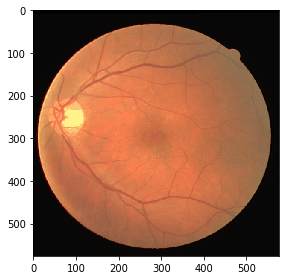

In [ ]:
io.imshow(X_train[0])

Melakukan proses training 

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
results = decoder_model.fit([X_train,X_green_train],y_train, validation_split=0.2, epochs=25, batch_size=6, callbacks=callbacks)

Epoch 1/25
16/16 [==============================] - 102s 4s/step - loss: 0.7405 - accuracy: 0.4600 - val_loss: 1.3605 - val_accuracy: 0.8386
Epoch 2/25
16/16 [==============================] - 58s 4s/step - loss: 0.6419 - accuracy: 0.5703 - val_loss: 1.3210 - val_accuracy: 0.8390
Epoch 3/25
16/16 [==============================] - 58s 4s/step - loss: 0.5767 - accuracy: 0.7289 - val_loss: 0.5977 - val_accuracy: 0.8374
Epoch 4/25
16/16 [==============================] - 58s 4s/step - loss: 0.4967 - accuracy: 0.8123 - val_loss: 0.3376 - val_accuracy: 0.8375
Epoch 5/25
16/16 [==============================] - 57s 4s/step - loss: 0.4101 - accuracy: 0.8181 - val_loss: 0.6166 - val_accuracy: 0.8415
Epoch 6/25
16/16 [==============================] - 58s 4s/step - loss: 0.3354 - accuracy: 0.8204 - val_loss: 0.3062 - val_accuracy: 0.8420
Epoch 7/25
16/16 [==============================] - 57s 4s/step - loss: 0.2863 - accuracy: 0.8216 - val_loss: 0.2822 - val_accuracy: 0.8419
Epoch 8/25
16/16 [=

Plotting history dari proses training untuk dilihat nilai loss dan accuracy dari hasil training, serta dilihat nilai val_loss dan val_accuracy dari hasil validasi

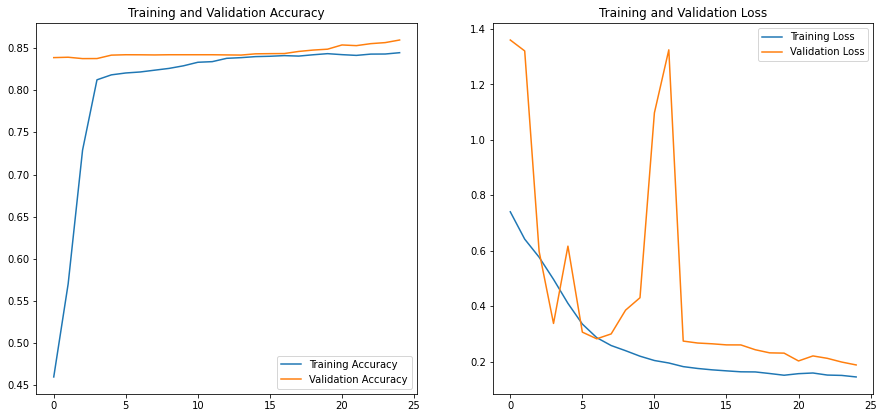

In [ ]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# path_folder = "/content/drive/MyDrive/TUGAS BESAR KENDALI DAN SISTEM CERDAS/STARE/augmentation"
# file_Xtest = glob.glob(path_folder+'/images/*.ppm')
# file_Ytest = glob.glob(path_folder+'/masks/*.ppm')
# Xtest = []
# Xtestgreen = []
# Ytest = []

# IMG_HEIGHT = 576
# IMG_WIDTH = 576

# for i, j in tqdm(enumerate(file_Xtest),total=len(file_Xtest)):
#   imgx = io.imread(j)
#   imgx = resize(imgx,(IMG_HEIGHT,IMG_WIDTH))
#   imgGreen = imgx.copy()
#   imgGreen[:,:,0] = 0
#   imgGreen[:,:,2] = 0
#   Xtest.append(imgx)
#   Xtestgreen.append(imgGreen)

# for i, j in tqdm(enumerate(file_Ytest),total=len(file_Ytest)):
#   imgy = io.imread(j)
#   imgy = resize(imgy,(IMG_HEIGHT,IMG_WIDTH))
#   Ytest.append(imgy)

Menyimpan model yang berhasil ditraining (Option, tidak perlu dirunning juga tidak apa)

In [ ]:
decoder_model.save("/content/drive/MyDrive/TUGAS BESAR KENDALI DAN SISTEM CERDAS/model_train1.h5")

In [ ]:
mod = keras.models.load_model('/content/drive/MyDrive/TUGAS BESAR KENDALI DAN SISTEM CERDAS/model_train1.h5')

In [ ]:
Xtest[0].shape

Proses untuk melakukan evaluasi menggunakan data testing

In [ ]:
loss,acc = decoder_model.evaluate(x=(x_test,x_testgreen),y=y_test,verbose=1)